# Import Libraries dan Dataset

In [25]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
!pip install emoji
!pip install langdetect
!pip install nltk
!pip install swifter
!pip install Sastrawi
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install regex
!pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import numpy as np
import re
import emoji
import nltk
import swifter
import sklearn
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline

#import data yang ada 
df = pd.read_csv('mypertamina.tsv', sep='\t', names=['komentar', 'rating', 'kategori'])

  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df.sample(5)

,komentar,rating,kategori
426,Bukanya lemot heuy ... Apa Krn banyak menu kal...,2,negatif
716,lapor...kenapa gas 3 kg eceran harganya mahal ...,2,negatif
584,Ikut aturan aja yg penting positif,4,positif
1532,Tolong pembayaraanya ditambah jgn hanya menggu...,2,negatif
1510,Tidak membantu,1,negatif


In [29]:
print(f'shape: {df.shape}')

shape: (1600, 3)


In [30]:
df['kategori'].value_counts()

positif    800
negatif    800
Name: kategori, dtype: int64

# Mendeteksi Jenis Bahasa dalam Dataset

In [31]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0
def detect_textlang(komentar):
  try:
    src_lang = detect(komentar)
    if src_lang =='id':
      return 'id'
    else:
        #return "NA"
        return src_lang
  except:
        return "NA"
df['bahasa']=df.komentar.apply(detect_textlang)

In [32]:
df.sample(5)

,komentar,rating,kategori,bahasa
1474,Terkadang nga semua SPBU.tidak mempergunakan a...,4,positif,id
1404,Sudah pakai 3 tahun,4,positif,id
1561,"Untuk login sekarang masih pakek kode lagi, ga...",4,positif,id
984,Nggak begitu penting Bikin ribet aja,2,negatif,id
389,Bingun cara pakainya,1,negatif,id


In [33]:
# Bahasa Selain Indonesia
df[df.bahasa != 'id'].sample()

,komentar,rating,kategori,bahasa
45,Apk ga guna,1,negatif,tl


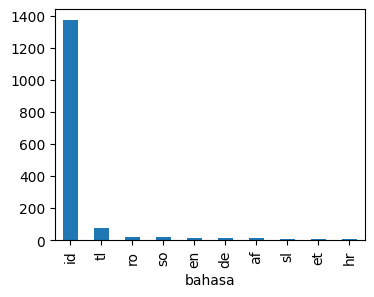

In [34]:
# Grafik Jumlah Bahasa dalam Dataset
plt.figure(figsize=(4,3))
df.groupby(df.bahasa).komentar.count().sort_values(ascending=False).head(10).plot.bar()
plt.show()

In [35]:
df['bahasa'].value_counts()

id    1370
tl      76
ro      21
so      21
en      17
de      16
af      15
sl      10
et       8
hr       7
sw       6
da       6
ca       5
fi       5
no       3
sk       3
es       2
pl       2
tr       2
sv       2
lt       1
pt       1
it       1
Name: bahasa, dtype: int64

In [36]:
# Filter Bahasa yang Bukan Bahasa Indonesia
df=df[df['bahasa']=='id']
df.sample(5)

,komentar,rating,kategori,bahasa
403,Bisa digunakan walau slow response,4,positif,id
120,Aplikasi mempersulit rakyat,1,negatif,id
970,My pertamina memudahkan saya dalam transaksi p...,5,positif,id
395,Bintang 4 dulu. Sudah bagus. Tetapi perlu diti...,4,positif,id
1232,Sangat susah login nya,2,negatif,id


# Text Preprocessing

1. Data Cleaning dan Case Folding

In [37]:
def clean(komentar: str):
  #Mengambil data berupa alfabet dan spasi
  komentar="".join(c.lower()for c in komentar if c.isalpha() or c in[" "])
  #Membuang spasi berlebih
  komentar=" ".join(komentar for komentar in komentar.split())
  #Menghapus emoji yang terdapat dalam komentar
  komentar=emoji.demojize(komentar)
  komentar=re.sub(r':[A-Za-z_-]+:',' ',komentar)#menghapus emoji
  #Menghapus emoticon yang terdapat dalam komentar
  komentar=re.sub(r"([xX;:['?]dDpPvVoO3)(])",' ',komentar)
  #Menghapus angka dan beberapa simbol
  komentar=re.sub(r'[^a-zA-Z,.?!]+',' ',komentar)
  return komentar

In [38]:
df['cleaning']=df['komentar'].apply(clean)

In [39]:
df.sample(3)

,komentar,rating,kategori,bahasa,cleaning
1279,Sejauh ini masih amam aman aja ðŸ˜ŠðŸ˜ŠðŸ˜Š,5,positif,id,sejauh ini masih amam aman aja
696,kode verifikasi via email tidak jalan /tidak bisa,2,negatif,id,kode verifikasi via email tidak jalan tidak bisa
823,Masih mencoba,4,positif,id,masih mencoba


2. Tokenisasi

In [40]:
def tokenization(komentar):
  komentar=re.split('\W+', komentar)
  return komentar

df['tokenization']=df['cleaning'].apply(tokenization)

In [41]:
df.sample(3)

,komentar,rating,kategori,bahasa,cleaning,tokenization
1299,Semga bermanfaat. Maju terus Pertamina Indonesia,4,positif,id,semga bermanfaat maju terus pertamina indonesia,"[semga, bermanfaat, maju, terus, pertamina, in..."
97,Aplikasi ini akan sangat membantu jika menyert...,4,positif,id,aplikasi ini akan sangat membantu jika menyert...,"[aplikasi, ini, akan, sangat, membantu, jika, ..."
1311,Semoga BBM Subsidi tepat sasaran untuk wong cilik,5,positif,id,semoga bbm subsidi tepat sasaran untuk wong cilik,"[semoga, bbm, subsidi, tepat, sasaran, untuk, ..."


3. Normalisasi Kata Tidak Baku

In [42]:
normalizad_word=pd.read_csv('katabaku.csv')
normalizad_word_dict={}

for index, row in normalizad_word.iterrows():
  if row[0] not in normalizad_word_dict:
    normalizad_word_dict[row[0]]=row[1]

    def normalized_term(document):
      return[normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

  

In [43]:
df['normal']=df['tokenization'].apply(normalized_term)

In [44]:
df.sample(3)

,komentar,rating,kategori,bahasa,cleaning,tokenization,normal
1233,Saran : tambahin lagi metode pembayaran lewat ...,4,positif,id,saran tambahin lagi metode pembayaran lewat go...,"[saran, tambahin, lagi, metode, pembayaran, le...","[saran, tambahkan, lagi, metode, pembayaran, l..."
320,Baru mau buka aja susah,2,negatif,id,baru mau buka aja susah,"[baru, mau, buka, aja, susah]","[baru, mau, buka, saja, susah]"
1381,Slogan Pertamina klo ad ribet knp hrus yg mudah,2,negatif,id,slogan pertamina klo ad ribet knp hrus yg mudah,"[slogan, pertamina, klo, ad, ribet, knp, hrus,...","[slogan, pertamina, kalau, ada, ribet, kenapa,..."


4. Stopword Removal

In [45]:
#Menghapus kata umum yang tidak penting
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
list_stopwords=stopwords.words('indonesian', 'english')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'nya', 'ny', 'klo', 'klu',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 'gak', 'ga',
                       'krn', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u',
                       'nan', 'loh', 'yah', 'fps', 'pin', 'udah', 'udh', 'pas', 'main', 'no', 'gabisa', 'bagaimana',
                       'gbsa', 'g', 'gdlu', 'ap', 'gimana', 'saya', 'hehehe', 'si', 'tau', 'tahu','saya', 'a', 'b', 'c',
                      'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
                      'w', 'x', 'y','z','huh', 'hah', 'haah', 'ih', 'lha', 'lah', 'loh', 'hehehe', 'hahaha' ])
txt_stopword=pd.read_csv('stopwords.csv', names=['stopwords'], header=None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords=set(list_stopwords)



In [46]:
def stopwords_removal(komentar):
  return [word for word in komentar if word not in list_stopwords]
df['stopword']=df['normal'].apply(stopwords_removal)
df.sample(3)

,komentar,rating,kategori,bahasa,cleaning,tokenization,normal,stopword
724,Lebih ke operator spbu yg blm siap,4,positif,id,lebih ke operator spbu yg blm siap,"[lebih, ke, operator, spbu, yg, blm, siap]","[lebih, ke, operator, spbu, yang, belum, siap]","[operator, spbu]"
184,aplikasi yang mempersulit penggunanya. padahal...,1,negatif,id,aplikasi yang mempersulit penggunanya padahal ...,"[aplikasi, yang, mempersulit, penggunanya, pad...","[aplikasi, yang, mempersulit, penggunanya, pad...","[aplikasi, mempersulit, penggunanya, kuota, di..."
1335,Semoga lekas di bubarkan aplikasi zolimi rakya...,1,negatif,id,semoga lekas di bubarkan aplikasi zolimi rakya...,"[semoga, lekas, di, bubarkan, aplikasi, zolimi...","[semoga, lekas, di, bubarkan, aplikasi, zolimi...","[semoga, lekas, bubarkan, aplikasi, zolimi, ra..."


5. Stemming

In [47]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [48]:
def stem(teks):
  text = [stemmer.stem(word) for word in teks]
  return text

In [49]:
df['stemming']=df['stopword'].apply(lambda x: stem(x))
df.to_csv('mypertamina-stemming.tsv', sep='\t', index=False, header=None)

In [51]:
df.to_excel('mypertamina-stemming.xlsx', index=False)

In [52]:
df.head()

,komentar,rating,kategori,bahasa,cleaning,tokenization,normal,stopword,stemming
0,. Semoga kedepan.ny semakin berkembang,5,positif,id,semoga kedepanny semakin berkembang,"[semoga, kedepanny, semakin, berkembang]","[semoga, kedepannya, semakin, berkembang]","[semoga, kedepannya, berkembang]","[moga, depan, kembang]"
1,"... aplikasi yg simpel, semoga semakin baik",4,positif,id,aplikasi yg simpel semoga semakin baik,"[aplikasi, yg, simpel, semoga, semakin, baik]","[aplikasi, yang, simpel, semoga, semakin, baik]","[aplikasi, simpel, semoga]","[aplikasi, simpel, moga]"
2,1. Lambat 2. Login berulang 3. Tata letak tomb...,1,negatif,id,lambat login berulang tata letak tombol kolom ...,"[lambat, login, berulang, tata, letak, tombol,...","[lambat, login, berulang, tata, letak, tombol,...","[lambat, login, berulang, tata, letak, tombol,...","[lambat, login, ulang, tata, letak, tombol, ko..."
4,2kali gagal menggunakan my pertamina untuk mem...,2,negatif,id,kali gagal menggunakan my pertamina untuk memb...,"[kali, gagal, menggunakan, my, pertamina, untu...","[kali, gagal, menggunakan, my, pertamina, untu...","[kali, gagal, my, pertamina, membayar, pembeli...","[kali, gagal, my, pertamina, bayar, beli, pert..."
5,4 bintang aja dulu kalau lancar baru diberi 5 ...,4,positif,id,bintang aja dulu kalau lancar baru diberi bintang,"[bintang, aja, dulu, kalau, lancar, baru, dibe...","[bintang, saja, dulu, kalau, lancar, baru, dib...","[bintang, lancar, bintang]","[bintang, lancar, bintang]"
